In [1]:
import numpy as np
import control as co
import sympy as sym
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline
sym.init_printing()

In [2]:
import ipywidgets
from ipywidgets import FloatSlider, VBox, HBox, interactive_output
from IPython.display import display

### Order of a system

* The order refers to the order of the equivalent differential equation representing the system
* The order of the denominator of the transfer function after cancellation of common factors in the numerator.
* The number of simultaneous first-order equations required for the state-space representation.

### System Response
**Forced response:** For linear systems, that part of the total response function due to the input. It is typically of the same form as the input and its derivatives.

**Natural response:** That part of the total response function due to the system and the way the system acquires or dissipates energy

The output response of a system is the sum of two responses: the forced response and the natural response.

### Poles of a Transfer Function
The poles of a transfer function are 
1. The values of the Laplace transform variable, s, that cause the transfer function to become infinite or 
2. Any roots of the denominator of the transfer function that are common to roots of the numerator

In general, G(s) is a rational function of the form
$$G(s) = \dfrac {N(s)}{D(s)}$$
When $D(s)=0$ the transfer function become to infinite.Hence the roots of $D(s)$ polynomial is called system poles.<br>
If $G(s)=\dfrac{s+2}{s^2+6s+25}$ then $N(s)=s+2$ and $D(s)=s^2+6s+25$
,

In [3]:
s=co.tf("s")
G=(s+2)/(s**2+6*s+25)
G

TransferFunction(array([1, 2]), array([ 1,  6, 25]))

In [4]:
co.pole(G)

array([-3.+4.j, -3.-4.j])

The system $G(s)=\dfrac{s+2}{s^2+6s+25}$ has two pole at $s=-3+4j$, $-3-4j$

### Zeros of a Transfer Function
The zeros of a transfer function are 
1. The values of the Laplace transform variable, s, that cause the transfer function to become zero or 
2. Any roots of the numerator of the transfer function that are common to roots of the denominator

### Pole-Zero plot

### Poles and Zeros of a First-Order System: An Example
Suppose the system transfer function $$G(s)=\dfrac{s+2}{s+5}$$
If the reference input is $R(s)$ and output response is $C(s)$ in frequency domain then$$C(s)=G(s)R(s)$$
When reference input $R(s)=\dfrac{1}{s}$ the output response $$C(s)=\dfrac{1}{s}\times \dfrac{s+2}{s+5}=\dfrac{s+2}{s(s+5)}$$

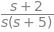

In [5]:
t, s = sym.symbols('t, s')
C=(s+2)/(s*(s+5))
C

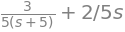

In [6]:
partial_fraction=C.apart(s)
partial_fraction

In [7]:
c_t=sym.inverse_laplace_transform(partial_fraction, s,t)
c_t

So time domain step response of this first order system is $$c(t)=\left [\dfrac{2}{5}+\dfrac{3}{5}\times e^{-5t}\right ]u(t)$$
The pole zero plot of $C(s)=\dfrac{s+2}{s(s+5)}$ is shown bt python code

<IPython.core.display.Javascript object>


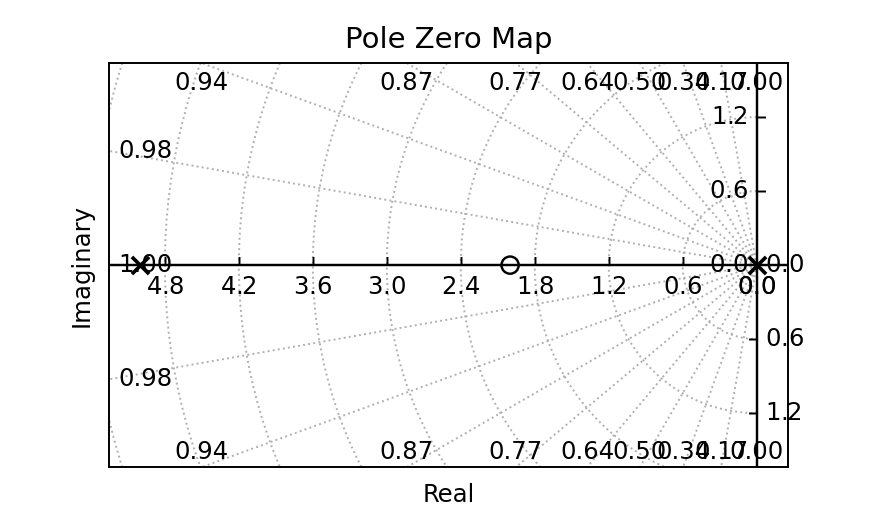

(array([-5.,  0.]), array([-2.]))

In [11]:
s=co.tf("s")
C=(s+2)/(s*(s+5))
plt.figure(1, figsize=(5, 3))
co.pzmap(C, grid=True)

Below figure shows the first order system step response evolution by inspection.
<img src="https://github.com/sayedul79/python-control-system/blob/main/image/first-order-system-response.png?raw=true">

From the above development we draw the following conclusion
1. A pole of the input function generates the form of the forced response (i.e., the pole at the origin generated a step function at the output).

In [9]:
s, t=sym.symbols('s, t')
pole_origin=1/s
inv_lap=sym.inverse_laplace_transform(pole_origin, s, t)
inv_lap

<IPython.core.display.Javascript object>


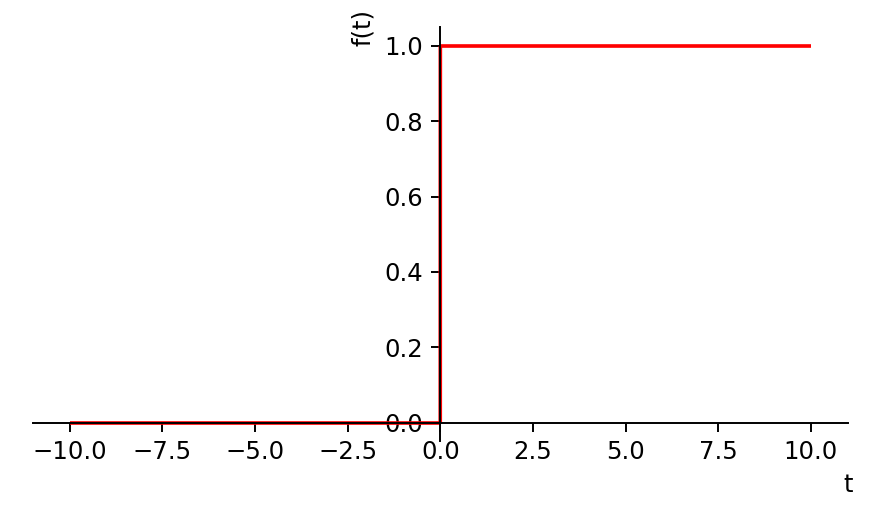

In [10]:
sym.plot(inv_lap, line_color="red", 
         size=(5,3))

2. A pole of the transfer function generates the form of the natural response (i.e., the pole at −5 generated $e^{−5t}$).

In [12]:
s, t=sym.symbols("s, t")
pole_real_axis=1/(s-5)
inv_lap=sym.inverse_laplace_transform(pole_real_axis, s, t)
inv_lap

<IPython.core.display.Javascript object>


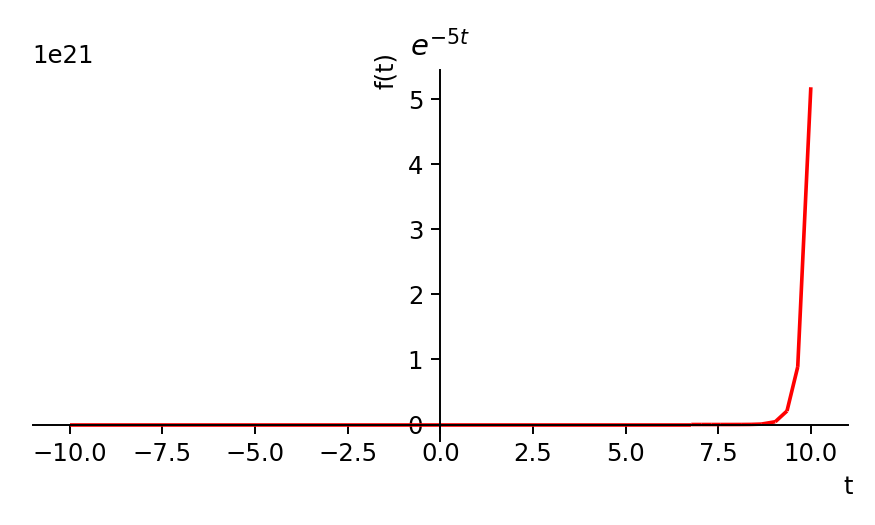

In [13]:
sym.plot(inv_lap, line_color="red", size=(5,3), 
        title=r'$e^{-5t}$')

3. A pole on the real axis generates an exponential response of the form $e^{−αt}$, where −α is the pole location on the real axis. Thus, the farther to the left a pole is on the negative real axis, the faster the exponential transient response will decay to zero (again, the pole at −5 generated $e^{−5t}$.

In [14]:
def decay_interact(a=0):
    t=np.arange(0,5, .01)
    y=np.exp(a*t)
    plt.figure(4,figsize=(8,5))
    ax=plt.axes()
    ax.plot(t, y, color="red",
             linewidth=2,
             label=fr"$a={a}$")
    #move left y axis and bottom x axis to center (0,0)
    ax.spines["left"].set_position("zero")
    ax.spines["bottom"].set_position("zero")
    #Eliminate upper and right axes
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.grid()
    ax.legend()

In [15]:
%matplotlib inline
a=FloatSlider(value=-3, min=-8, max=-0.8, step=0.2, description="a")
plot_interact=interactive_output(decay_interact, {"a":a})
layout=VBox([a, plot_interact])
display(layout)

<img src="https://github.com/sayedul79/python-control-system/blob/main/image/effefct-of-real-axis-pole-upon-transient-response.png?raw=true">
Each pole of the system transfer function that is on the real axis
generates an exponential response that is a component of the natural response. The
input pole generates the forced response.


4. The zeros and poles generate the amplitudes for both the forced and natural responses .

### Evaluating Response Using Poles
<img src="https://github.com/sayedul79/python-control-system/blob/main/image/Evaluating%20Response%20Using%20Poles.png?raw=true">

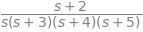

In [16]:
s, t=sym.symbols("s, t")
G=(s+2)/((s+3)*(s+4)*(s+5))
R=1/s
C=G*R
C

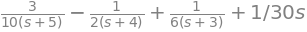

In [17]:
partial_fraction_C=C.apart(s)
partial_fraction_C

In [18]:
c_time_domain=sym.inverse_laplace_transform(partial_fraction_C, s, t)
c_time_domain

### First-order system
We now discuss first-order systems without zeros to define a performance
specification for such a system. A first-order system without zeros can be described by
the transfer function $G(s)=\dfrac {a}{s+a}$. If the input is a unit step, where $R(s) =\dfrac{1}{s}$, the Laplace transform of the step response is $C(s)$, where $$C(s)=\dfrac{a}{s(s+a)}$$

In [19]:
a, b, s, t=sym.symbols("a, b, s, t", real=True)
C=a/(s*(s+a))
partial_fraction_C=C.apart(s)
partial_fraction_C

In [20]:
c_time_domain=sym.inverse_laplace_transform(partial_fraction_C, s, t)
c_time_domain

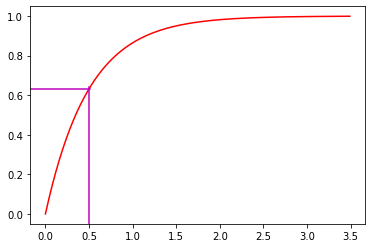

In [21]:
a=2
time_constant=1/a
t=np.arange(0, 7*time_constant, step=.01)
c_t=1-np.exp(-a*t)
#final value of c(t) when t tends to infinity
final_value=1
#value of c(t) when t=one time constant 
c_time_constant_1=0.63*final_value
#plot figure
plt.plot(t, c_t, color="red")
plt.axvline(x=time_constant, 
            ymax=c_time_constant_1, 
            color="m")
plt.axhline(y=c_time_constant_1, 
            color="m",
            xmax=0.18)

Let us examine the significance of parameter a, the only parameter needed to describe
the transient response. When $t =\dfrac{1}{a}$,
 $$e^{-at}|_{t=1/a}=e^{-1}=0.37 \tag{1}$$
 
 
 From first order time domain response $c(t)=[1-e^{-at}]u(t)$
 At t=1/a $$c(t)|_{t=1/a}=1-e^{-at}|_{t=1/a}=1-0.37=0.63 \tag{2}$$

### [Time Constant](https://en.wikipedia.org/wiki/Time_constant#:~:text=In%20physics%20and%20engineering%2C%20the,a%20first%2Dorder%20LTI%20system.)
The time constant **($\tau$)** is the parameter characterizing the response to a step input of a first-order, linear time-invariant (LTI) system. The time constant is the main characteristic unit of a first-order LTI system.
* We call 1/a the time constant of the response. From Eq. (1), the time constant can be described as the time for $e^{-at}$ to decay to 37% of its initial value.<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/39/Series_RC_resistor_voltage.svg/800px-Series_RC_resistor_voltage.svg.png"/> Alternately, from Eq. (2), the time constant is the time it takes for the step response to rise to 63% of its final value.<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/Series_RC_capacitor_voltage.svg/800px-Series_RC_capacitor_voltage.svg.png"/>


* The reciprocal of the time constant has the units (1/seconds), or frequency. Thus, we can call the parameter **a** the **exponential frequency**. Since the derivative of $e^{{-at}$ is −a when t = 0, a is the initial rate of change of the exponential at t = 0. Thus, the time constant can be considered a transient response specification for a first-order system, since it is related to the speed at which the system responds to a step input.


* The time constant can also be evaluated from the pole plot <img src="https://github.com/sayedul79/python-control-system/blob/main/image/4.4.png?raw=true">. Since the pole of the transfer function is at −a, we can say the pole is located at the reciprocal of the time constant, and the farther the pole from the imaginary axis, the faster the transient response.

### Rise Time, $T_r$
The time required for the step response to go from 0.1 (10%) of the final
value to 0.9 (90%) of the final value.

### Settling Time, $T_s$
Settling time is defined as the time for the response to reach, and stay within, 2% of
its final value.2 Letting c (t) = 0.98 in Eq. (2) and solving for time, t, we find the
settling time to be

## 4.4 Second-Order Systems: Introduction
Let us now extend the concepts of poles and zeros and transient response to secondorder
systems. Compared to the simplicity of a first-order system, a second-order
system exhibits a wide range of responses that must be analyzed and described.
Whereas varying a first-order system's parameter simply changes the speed of the
response, changes in the parameters of a second-order system can change the form of
the response.
Let general second-order system without no zeros is $$G(s)=\dfrac{b}{s^2+as+b}$$
Now the step response $$C(s)=R(s)G(s)=\dfrac{b}{s(s^2+as+b)}$$

### Overdamped Response
A step response of a second‐order system that is characterized by
no overshoot


For this response $$C(s)=\dfrac{9}{s(s^2+9s+9)}=\dfrac{9}{s (s + 7.854) (s + 1.146)}$$
This function has a pole at the origin that comes from the unit step input and two real
poles that come from the system. The input pole at the origin generates the constant
forced response; each of the two system poles on the real axis generates an exponential
natural response whose exponential frequency is equal to the pole location. Hence, the
output initially could have been written as $$c(t) = K_1 + K_2e^{−7.854t} + K_3e^{−1.146t}$$. This
response, shown in Figure below, is called overdamped

In [48]:
s=co.tf("s")
G=9/(s**2+9*s+9)
C=9/(s*(s**2+9*s+9))
poles=np.around(C.pole(), 2)
poles

array([-7.85, -1.15,  0.  ])

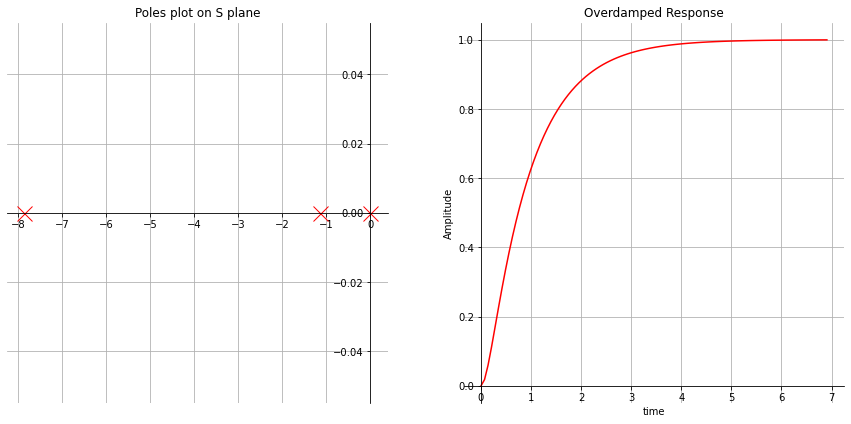

In [49]:
%matplotlib inline
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,7))

ax[0].plot(poles.real, poles.imag, 
           marker="x", 
           color="red", 
           linestyle="none", 
           markersize=15)
def spine_origin(axes_index, xlabel, ylabel, title):
    #move left y axis and bottom x axis to center (0,0)
    ax[axes_index].spines["left"].set_position(("data",0))
    ax[axes_index].spines["bottom"].set_position(("data", 0))
    #Eliminate upper and right axes
    ax[axes_index].spines["right"].set_visible(False)
    ax[axes_index].spines["top"].set_visible(False)
    ax[axes_index].set_xlabel(xlabel)
    ax[axes_index].set_ylabel(ylabel)
    ax[axes_index].set_title(title)
spine_origin(0, None, None, "Poles plot on S plane")
ax[0].grid()

#Step Response
t, y = co.step_response(G, t) # calculate the step response of G1
ax[1].plot(t, y, color="red")
spine_origin(1, "time", "Amplitude", "Overdamped Response")
ax[1].grid()

### Underdamped Response
The step response of a second‐order system that is characterized by
overshoot.


For this response $$C(s)=\dfrac {9}{s(s^2+2s+9)}$$
This function has a pole at the origin that comes from the unit step input and two
complex poles that come from the system.

In [25]:
s=sym.symbols("s")
t=sym.symbols("t", real=True)

In [26]:
system_poles=sym.solveset(s**2+2*s+9, s)
system_poles

In [27]:
C=9/(s*(s**2+2*s+9))
partial_fraction=C.apart(s)
c_time_domain=sym.inverse_laplace_transform(partial_fraction, s, t)
c_time_domain

So$$
\begin{equation}
c(t)=1-e^{-t}\left[\cos (2\sqrt{2}t)+\dfrac{\sqrt{2}}{4}\sin(2\sqrt{2}t)\right]
\label{eq: second-order-system}
\tag{3}
\end{equation}
$$
We now compare the response of the second-order system to the poles that generated it. First we will compare the pole location to the time function, and then we will compare the pole location to the plot. From above code, the poles that generate the natural response are at $s = −1 \pm j2\sqrt{2}$.Comparing these values to equation (3), we see that the real part of the pole matches the exponential decay frequency of the sinusoid's amplitude, while the imaginary part of the pole matches the frequency of the sinusoidal oscillation.


The transient response consists of an
exponentially decaying amplitude generated by the real part of the system pole times a sinusoidal waveform generated by the imaginary part of the system pole. The time constant of the exponential decay is equal to the reciprocal of the real part of the system pole. The value of the imaginary part is the actual frequency of the sinusoid. This sinusoidal frequency is given the name damped frequency of oscillation, $ω_d$. Finally, the steady-state response (unit step) was generated by the input pole located at the origin. We call the type of response an underdamped response, one which approaches a steady-state value via a transient response that is a damped oscillation.

In [46]:
s=co.tf("s")
G=9/(s**2+2*s+9)
C=9/(s*(s**2+2*s+9))
poles=np.around(C.pole(), 2)
poles

array([-1.+2.83j, -1.-2.83j,  0.+0.j  ])

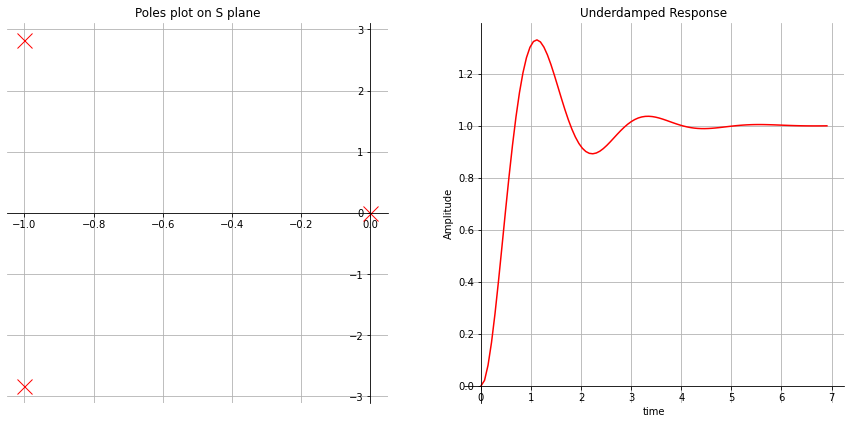

In [47]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,7))
ax[0].plot(poles.real, poles.imag, 
           marker="x", 
           color="red", 
           linestyle="none", 
           markersize=15)
def spine_origin(axes_index, xlabel, ylabel, title):
    #move left y axis and bottom x axis to center (0,0)
    ax[axes_index].spines["left"].set_position(("data",0))
    ax[axes_index].spines["bottom"].set_position(("data", 0))
    #Eliminate upper and right axes
    ax[axes_index].spines["right"].set_visible(False)
    ax[axes_index].spines["top"].set_visible(False)
    ax[axes_index].set_xlabel(xlabel)
    ax[axes_index].set_ylabel(ylabel)
    ax[axes_index].set_title(title)
spine_origin(0, None, None, "Poles plot on S plane")
ax[0].grid()

#Step Response
#t=np.arange(0, 10, 0.1)
t, y = co.step_response(G) # calculate the step response of G1
ax[1].plot(t, y, color="red")
spine_origin(1, "time", "Amplitude", "Underdamped Response")
ax[1].grid()

### Undamped Response
For this response, $$C(s)=\dfrac{9}{s(s^2+9)}$$
This function has a pole at the origin that comes from the unit step input and two
imaginary poles that come from the system. The input pole at the origin generates the
constant forced response, and the two system poles on the imaginary axis at $\pm j3$
generate a sinusoidal natural response whose frequency is equal to the location of the
imaginary poles. Hence, the output can be estimated as $$c(t) = K_1 + K_4 cos(3t − \phi)$$ This
type of response, shown in Figure below, is called undamped. Note that the absence of
a real part in the pole pair corresponds to an exponential that does not decay.
Mathematically, the exponential is $e^{−0t} = 1$.

In [44]:
s=co.tf("s")
G=9/(s**2+9)
C=9/(s*(s**2+9))
poles=np.around(C.pole(),2)
poles

array([-0.+3.j,  0.-3.j,  0.+0.j])

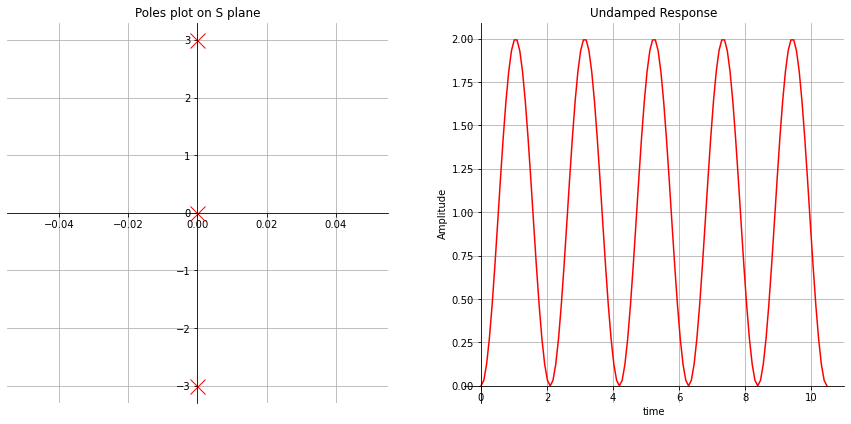

In [45]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,7))
ax[0].plot(poles.real, poles.imag, 
           marker="x", 
           color="red", 
           linestyle="none", 
           markersize=15)
def spine_origin(axes_index, xlabel, ylabel, title):
    #move left y axis and bottom x axis to center (0,0)
    ax[axes_index].spines["left"].set_position(("data",0))
    ax[axes_index].spines["bottom"].set_position(("data", 0))
    #Eliminate upper and right axes
    ax[axes_index].spines["right"].set_visible(False)
    ax[axes_index].spines["top"].set_visible(False)
    ax[axes_index].set_xlabel(xlabel)
    ax[axes_index].set_ylabel(ylabel)
    ax[axes_index].set_title(title)
spine_origin(0, None, None, "Poles plot on S plane")
ax[0].grid()

#Step Response
#t=np.arange(0, 10, 0.1)
t, y = co.step_response(G) # calculate the step response of G1
ax[1].plot(t, y, color="red")
spine_origin(1, "time", "Amplitude", "Undamped Response")
ax[1].grid()

### Critically Damped Response
The step response of a second‐order system with a given natural
frequency that is characterized by no overshoot and a rise time that
is faster than any possible overdamped response with the same
natural frequency.


For this response, $$C(s)=\dfrac {9}{s(s^2+6s+9)}=\dfrac{9}{s(s+3)^2}$$
This function has a pole at the origin that comes from the unit step input and two
multiple real poles that come from the system. The input pole at the origin generates
the constant forced response, and the two poles on the real axis at −3 generate a
natural response consisting of an exponential and an exponential multiplied by time,
where the exponential frequency is equal to the location of the real poles. Hence, the
output can be estimated as $$c(t) = K_1 + K_2e^{−3t} + K_3te^{−3t}$$ This type of response, shown
in Figure below, is called critically damped. Critically damped responses are the
fastest possible without the overshoot that is characteristic of the underdamped response.

In [41]:
s=co.tf("s")
G=9/(s**2+6*s+9)
C=9/(s*(s**2+6*s+9))
poles=np.around(C.pole(), 2)
poles

array([-3.+0.j, -3.-0.j,  0.+0.j])

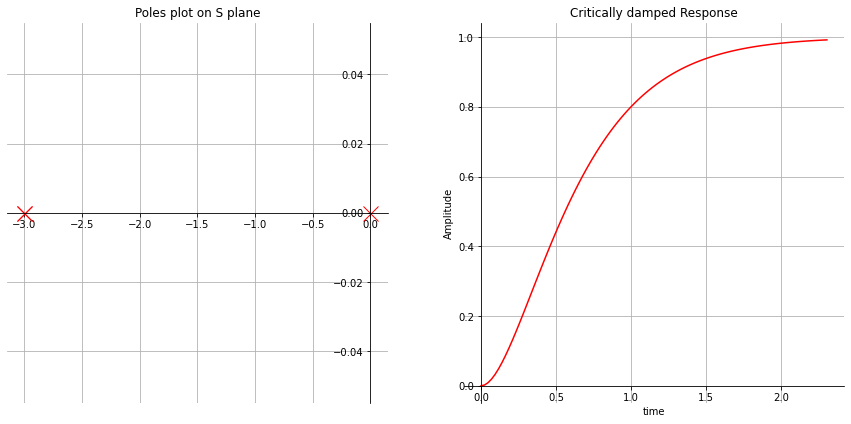

In [42]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,7))
ax[0].plot(poles.real, poles.imag, 
           marker="x", 
           color="red", 
           linestyle="none", 
           markersize=15)
def spine_origin(axes_index, xlabel, ylabel, title):
    #move left y axis and bottom x axis to center (0,0)
    ax[axes_index].spines["left"].set_position(("data",0))
    ax[axes_index].spines["bottom"].set_position(("data", 0))
    #Eliminate upper and right axes
    ax[axes_index].spines["right"].set_visible(False)
    ax[axes_index].spines["top"].set_visible(False)
    ax[axes_index].set_xlabel(xlabel)
    ax[axes_index].set_ylabel(ylabel)
    ax[axes_index].set_title(title)
spine_origin(0, None, None, "Poles plot on S plane")
ax[0].grid()

#Step Response
#t=np.arange(0, 10, 0.1)
t, y = co.step_response(G) # calculate the step response of G1
ax[1].plot(t, y, color="red")
spine_origin(1, "time", "Amplitude", "Critically damped Response")
ax[1].grid()

### Second-order system, pole plot and step response (At a glance) 
<img src="https://github.com/sayedul79/python-control-system/blob/main/image/4.7.png?raw=true"/>

### Key point of Overdamed, Underdamped, Critically damped response

**Overdamped response**
1. Poles: Two real at $−\sigma_1$, $−\sigma_2$<br> 
2. Natural response: Two exponentials with time constants equal to the reciprocal of the pole locations, or $$c(t) = K_1e^{−σ_1t} + K_2e^{−σ_2t}$$

**Underdamped response**
1. Poles: Two complex at $−\sigma_d \pm j\omega_d$
2. Natural response: Damped sinusoid with an exponential envelope whose time constant is equal to the reciprocal of the pole's real part. The radian frequency of the sinusoid, the damped frequency of oscillation, is equal to the imaginary part of the poles, or $$
c(t) = Ae^{−\sigma_d t} \cos (\omega_d t − \phi)$$

**Undamped responses**
1. Poles: Two imaginary at $\pm j\omega_1$
2. Natural response: Undamped sinusoid with radian frequency equal to the imaginary part of the poles, or $$c(t) = A \cos (\omega_1t − \phi)$$

**Critically damped responses**
1. Poles: Two real at $−\sigma_1$
2. Natural response: One term is an exponential whose time constant is equal to the reciprocal of the pole location. Another term is the product of time, t, and an exponential with time constant equal to the reciprocal of the pole location, or $$c(t) = K_1e^{−\sigma_1t} + K_2te^{−\sigma_1t}$$

## 4.5 The General Second-Order System
Now that we have become familiar with second-order systems and their responses, we
generalize the discussion and establish quantitative specifications defined in such a
way that the response of a second-order system can be described to a designer without
the need for sketching the response. In this section, we define two physically
meaningful specifications for second-order systems. These quantities can be used to
describe the characteristics of the second-order transient response just as time
constants describe the first-order system response. The two quantities are called
natural frequency and damping ratio.  

### Natural frequency, $\omega_n$
The frequency of oscillation of a system if all the damping is
removed.

For example, the frequency of oscillation of a series RLC
circuit with the resistance shorted would be the natural frequency.

### Damping Ratio, ζ
A viable definition for this quantity is one that compares the exponential decay
frequency of the envelope to the natural frequency. This ratio is constant regardless of
the time scale of the response. Also, the reciprocal, which is proportional to the ratio of
the natural period to the exponential time constant, remains the same regardless of
the time base.


$$\zeta=\frac{\text{Exponential decay frequency}}{\text{Natural frequency (rad/s)}}=\dfrac{1}{2\pi}\times \dfrac{\text{Natural period (seconds)}}{\text{Exponential time constant}}$$